# Worksheet 1

### This notebook contains the first set of exercises for the Open Quantum Systems course. By completing these exercises, you will learn methods to predict the dynamics of open quantum systems while also getting experience of programming in Python. Each of the 8 questions below is worth up to 4 marks. When completing the numerical exercises, please remember the following guidelines:
### - *Attempt each question*, even if you don't think you can solve it fully. 
### - *Comment* your code to explain what each part does. You will gain marks for well-commented code even if it does not exactly solve the problem. You will also lose marks for poorly commented code even if you get everything 100% correct.
### - Define variables and functions to make your code more readable and adaptable. This is especially useful when repeating the same calculation with different parameters.
### - Don't be afraid to look online for help! The [documentation](https://docs.python.org/3/#) is a good place to start but you can find many other useful sources with your favourite search engine.

---

In [165]:
from scipy.linalg import expm
import math
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt
from numpy import kron
import functools as ft

#pauli matrices
sigma_x=np.matrix([[0,1],[1,0]]) 
sigma_y=np.matrix([[0,-1j],[1j,0]]) 
sigma_z=np.matrix([[1,0],[0,-1]]) 
I = np.matrix([[1, 0], [0, 1]])

## 1

In the first lecture we considered the general qubit Hamiltonian
$$\hat{H} = \frac{\hbar\omega}{2} \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}$$
for some unit vector $\mathbf{u}= (u_x,u_y,u_z)$. In this exercise we will find a general analytical expression for the time evolution operator $ \hat{U}(t) = {\rm e}^{-{\rm i}\hat{H}t/\hbar}$.

(a) Let's warm up with the simplest case where $\mathbf{u} = (0,0,1)$. First show that $\hat{\sigma}_z^2 = \hat{\mathbb{1}}$ is equal to the identity operator. Now use this fact and the definition of the matrix exponential (i.e. its Taylor expansion) to show that

$$ {\rm e}^{-{\rm i}\omega \hat{\sigma}_zt/2} = \cos(\omega t/2) \hat{1} - {\rm i}\sin(\omega t/2) \hat{\sigma}_z.$$

[Hint: recall the Taylor expansions for $\cos(x) = \sum_{n=0}^\infty \frac{({\rm i} x)^{2n}}{(2n)!}$ and ${\rm i}\sin(x) = \sum_{n=0}^\infty \frac{({\rm i}x)^{2n+1}}{(2n+1)!}$]


Solution-

(a.1)
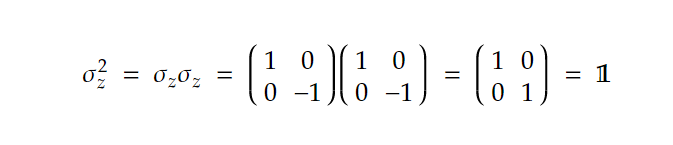


(a.2)
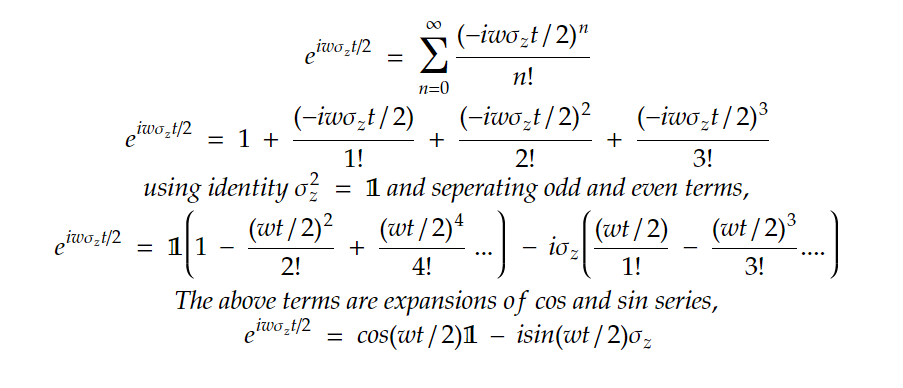

(b) The commutator between two operators $\hat{A}$ and $\hat{B}$ is defined by $[\hat{A},\hat{B}] = \hat{A}\hat{B}-\hat{B}\hat{A}$. The anti-commutator is defined by $\{\hat{A},\hat{B}\} = \hat{A}\hat{B}+\hat{B}\hat{A}$. The commutator between any pair of Pauli matrices is given in the typed lecture notes ([see Blackboard](https://tcd.blackboard.com)). Convince yourself that the anti-commutation relation

$$\{\hat{\sigma}_j,\hat{\sigma}_k \} = 2\delta_{jk} \hat{\mathbb{1}},$$

holds for any pair of indices $j,k = x,y,z$. Here, $\delta_{jk}$ is the Kronecker delta symbol, defined by $\delta_{jk} = 1$ if $j=k$ and $\delta_{jk} = 0$ otherwise. Using these 
commutation and anti-commutation relations (or otherwise), verify the identity:

$$ \hat{\sigma}_j\hat{\sigma}_k = \delta_{jk}  \hat{\mathbb{1}} + \sum_{l=x,y,z}{\rm i} \varepsilon_{jkl} \hat{\sigma}_l,$$  

where $\varepsilon_{ijk}$ is the Levi-Civita symbol, which is anti-symmetric under any pairwise permutation of its indices, $\varepsilon_{jkl}= -\varepsilon_{kjl} = \varepsilon_{klj}\ldots $ etc., and takes the value $\varepsilon_{jkl} = 1$ for $(j,k,l) = (x,y,z)$. Note that the anti-symmetric property implies that $\varepsilon_{jkl}=0$ whenever two or more indices are equal.

Solution-

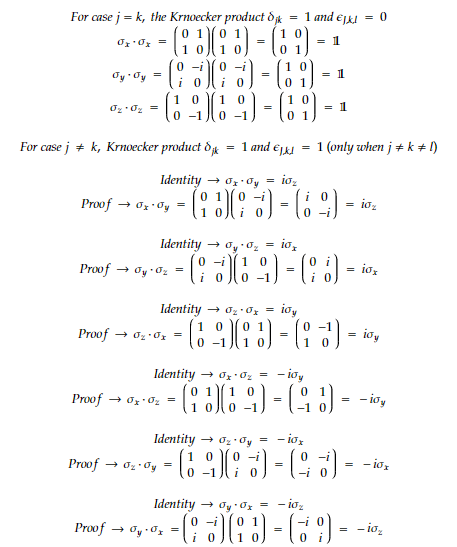


(c) Now consider a general $\mathbf{u}=(u_x,u_y,u_z)$, where all three components of $\mathbf{u}$ are non-zero. Using the identity from (b) and the fact that $\lVert\mathbf{u}\rVert = 1$, prove that

$$ \hat{H}^2 = \left(\frac{\hbar\omega}{2}\right)^2\hat{\mathbb{1}}.$$

Solution -
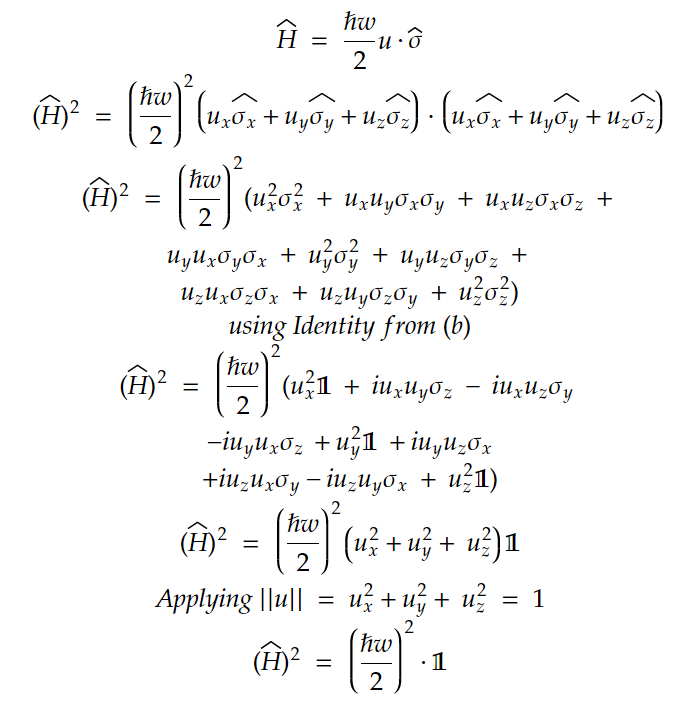

Use this result to show that, in general,

$$ \hat{U}(t) = \cos(\omega t/2) \hat{\mathbb{1}} -{\rm i} \sin(\omega t/2) \mathbf{u} \cdot \hat{\boldsymbol{\sigma}}.$$

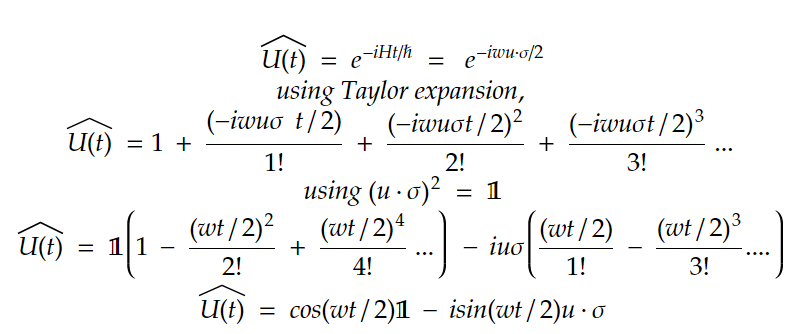

(d) Set $\mathbf{u} = (1,1,0)/\sqrt{2}$, and use the result of (c) to calculate the 
calculate an analytical expression for the operator $\hat{\sigma}_z$ in the Heisenberg picture:

$$ \hat{\sigma}_{z,H}(t) = \hat{U}^\dagger(t) \hat{\sigma}_z \hat{U}(t). $$

Solution-
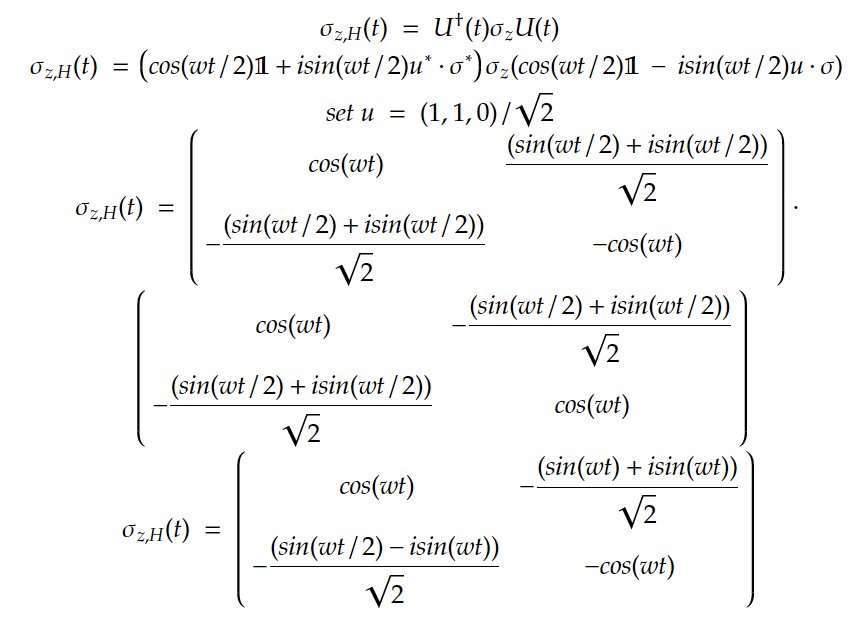

(e) Find the expectation value $\langle \downarrow|\hat{\sigma}_{z,H}(t)|\downarrow\rangle$. Plot your analytical result as a function of the dimensionless time variable $\omega t$ using [matplotlib](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). (Remember to label your axes!) 

Solution-
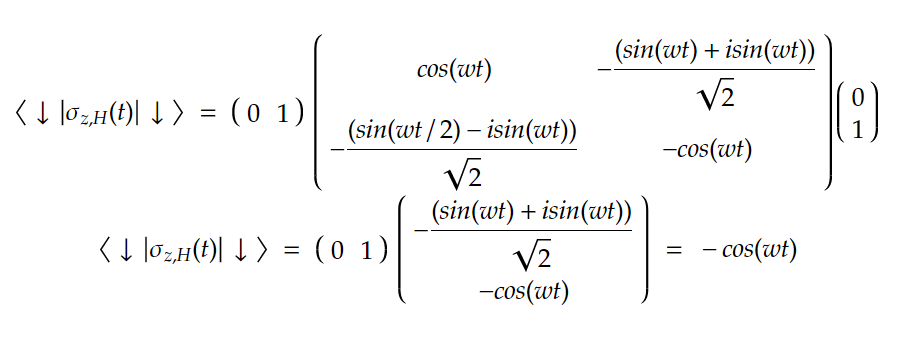

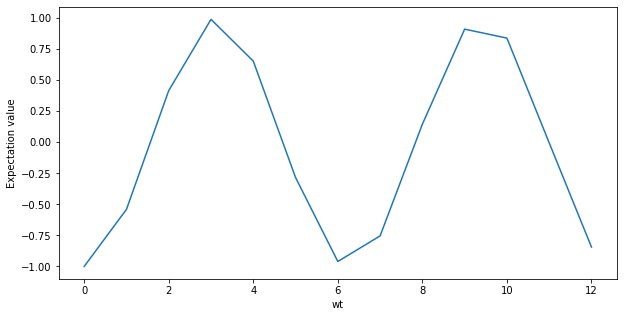

In [141]:
expectation_result = []
time_variable = []

for wt in range(0,13):
    result = -np.cos(wt)
    expectation_result.append(result.real)
    time_variable.append(wt)

plt.subplots(figsize=(10,5))
plt.xlabel("wt")
plt.ylabel("Expectation value")
plt.plot(time_variable,expectation_result)
plt.show()

## 2
Now we'll do some numerical calculations with the same system. Let's set $\hbar\omega=0.2$, and consider the case $\mathbf{u} = (1,1,0)/\sqrt{2}$. 

(a) Write down the Hamiltonian matrix as a NumPy array and verify that $ \hat{H}^2 = (\hbar\omega/2)^2\hat{\mathbb{1}}.$

In [138]:
hbarw = 0.2
H_constant = hbarw/2
H = (H_constant/math.sqrt(2))*np.matrix([[0,(1-1j)],[(1+1j),0]])
print("The matrix form of the Hamiltonian is -\n",H)

H_square = np.matmul(H,H)
print("\n The square of the Hamiltonian is -\n",H_square)

H_constant_square = H_constant*H_constant
print("\nThis is basically Identity Operator after removing the squared eigenvalue -\n",H_square/H_constant_square)

The matrix form of the Hamiltonian is -
 [[0.        +0.j         0.07071068-0.07071068j]
 [0.07071068+0.07071068j 0.        +0.j        ]]

 The square of the Hamiltonian is -
 [[0.01-2.05548772e-19j 0.  +0.00000000e+00j]
 [0.  +0.00000000e+00j 0.01+2.05548772e-19j]]

This is basically Identity Operator after removing the squared eigenvalue -
 [[1.-2.05548772e-17j 0.+0.00000000e+00j]
 [0.+0.00000000e+00j 1.+2.05548772e-17j]]


(b) Consider an initial state $|\psi(0)\rangle = |\downarrow\rangle$. Write down the state as a NumPy array and verify numerically that it is **not** an eigenstate of the Hamiltonian matrix. Find the true eigenstates of $\hat{H}$.

In [42]:
psi_0 = np.matrix([[0],[1]])
#To verify whther psi_0 is the eigenvector of H, multiply them and try to factor out in terms of psi_0
print(np.matmul(H,psi_0))
print("The matrix can't be factored out to get psi_0. So this is not an eigenvector of H")

#Finding eigenvalue of Hamiltonian
eigenvalue,eigenstate=eig(H)
print("\n\n The true eigenstates and eigenvalues of H are-")
print("Eigenvalue : ",eigenvalue)
print("Eigenstate : ",eigenstate)

[[0.07071068-0.07071068j]
 [0.        +0.j        ]]
The matrix can't be factored out to get psi_0. So this is not an eigenvector of H


 The true eigenstates and eigenvalues of H are-
Eigenvalue :  [ 0.1+0.j -0.1+0.j]
Eigenstate :  [[ 0.5       -0.5j  0.70710678+0.j ]
 [ 0.70710678+0.j  -0.5       -0.5j]]


(c) Find the time evolution operator $\hat{U}(\Delta t)$ over a small time step $\Delta t = 0.05$ (e.g. using the [expm function](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.expm.html) or another method of your choosing).
Verify numerically that $\hat{U}(\Delta t)$ is unitary.

In [43]:
U_delta_t = expm(-1j*H*0.05)
print("Time evolution over small time step 0.05 -\n",U_delta_t)

# To prove that U(delta_t) is unitary, it should satisy the property of unitary operators
U_delta_t_dagger = np.conjugate(U_delta_t)
print("\n U_t_dagger -\n", U_delta_t_dagger)
print("\n\nU_t * U_t_dagger = ",np.matmul(U_delta_t_dagger,U_delta_t),"=Identity")

Time evolution over small time step 0.05 -
 [[ 0.9999875 -2.99209803e-28j -0.00353552-3.53551917e-03j]
 [ 0.00353552-3.53551917e-03j  0.9999875 +2.99207933e-28j]]

 U_t_dagger -
 [[ 0.9999875 +2.99209803e-28j -0.00353552+3.53551917e-03j]
 [ 0.00353552+3.53551917e-03j  0.9999875 -2.99207933e-28j]]


U_t * U_t_dagger =  [[ 0.999975  +2.49997917e-05j -0.00707095+8.46650100e-19j]
 [ 0.00707095-8.46655521e-19j  0.999975  -2.49997917e-05j]] =Identity


(d) Consider the following simple way to simulate time evolution numerically in a given time interval $[0,t]$, which is very effective for relatively simple quantum systems. Discretise the time interval into a grid of $N$ equally spaced times $t_n = n\Delta t$, where $\Delta t = t/N$ and $N$ is a large integer. The solutions of the Schrödinger equation evaluated at two different time points $t$ and $t'$ are related by $|\psi(t')\rangle = \hat{U}(t'-t)|\psi(t)\rangle$. Therefore, one can find the state at each point on the grid by the iteration

$$ |\psi(t_{n+1})\rangle = \hat{U}(\Delta t) |\psi(t_n)\rangle, $$

starting from the boundary condition $|\psi(t_0)\rangle = |\psi(0)\rangle$. Use this method to find the expectation value $\langle \psi(t)|\hat{\sigma}_z|\psi(t)\rangle$ given the initial condition $|\psi(0)\rangle = |\downarrow\rangle$, and evolve up to time $\omega t=30$. Plot the result as a function of the dimensionless time variable $\omega t$.

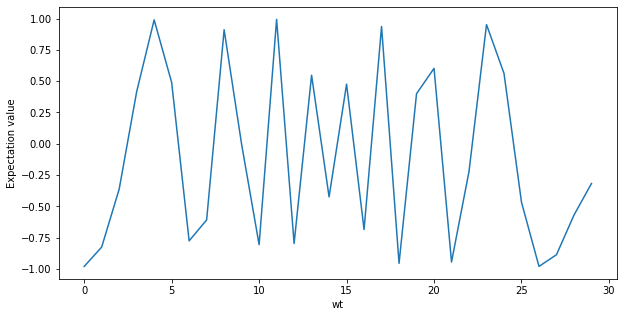

In [140]:
expectation_values = []
time = []

psi_t = np.matrix([[0],[1]])

for wt in range(30):
    psi_t = expm(-1j * wt * H) @ psi_t
    psi_t = U_delta_t*psi_t
    expectation = psi_t.T.conjugate() @ sigma_z @ psi_t
    expectation_values.append(float(expectation.real))
    time.append(wt)
    
plt.subplots(figsize=(10,5))
plt.xlabel("wt")
plt.ylabel("Expectation value")   
plt.plot(time,expectation_values)
plt.show()

## 3
Let us now perform a similar calculation by a different method. The Bloch vector is defined by $\mathbf{s} =(s_x,s_y,s_z) = (\langle\hat{\sigma}_x\rangle,\langle\hat{\sigma}_y\rangle,\langle\hat{\sigma}_z\rangle)$, where $\langle \bullet\rangle = \langle \psi(t)|\bullet|\psi(t)\rangle$ denotes the expectation value with respect to the time-dependent state of the qubit. 

(a) By considering the Heisenberg equations of motion for the Pauli matrices, derive the equation

$$\mathbf{\dot{s}} = \omega \,\mathbf{u}\times \mathbf{s},$$

where the dot indicates a time derivative. Without any calculation, sketch the solution of this equation on the Bloch sphere for $\mathbf{u} = (0,1,0)$.



Solution-

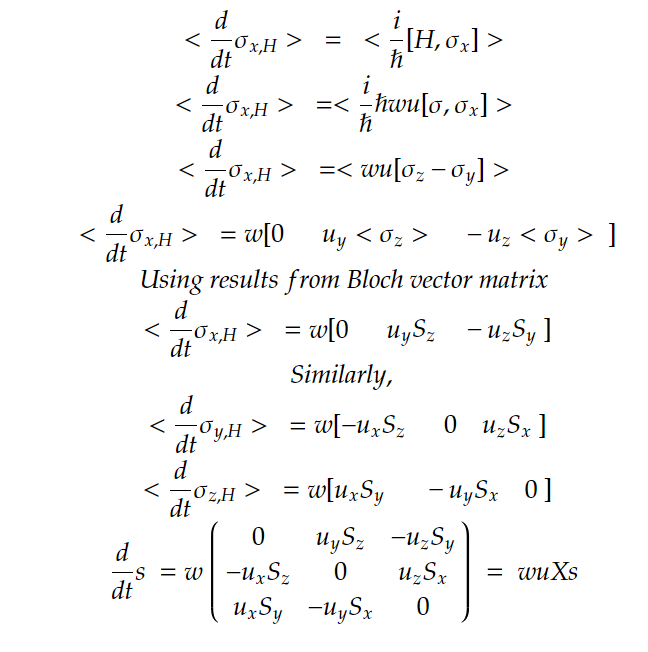

Block vector plot-
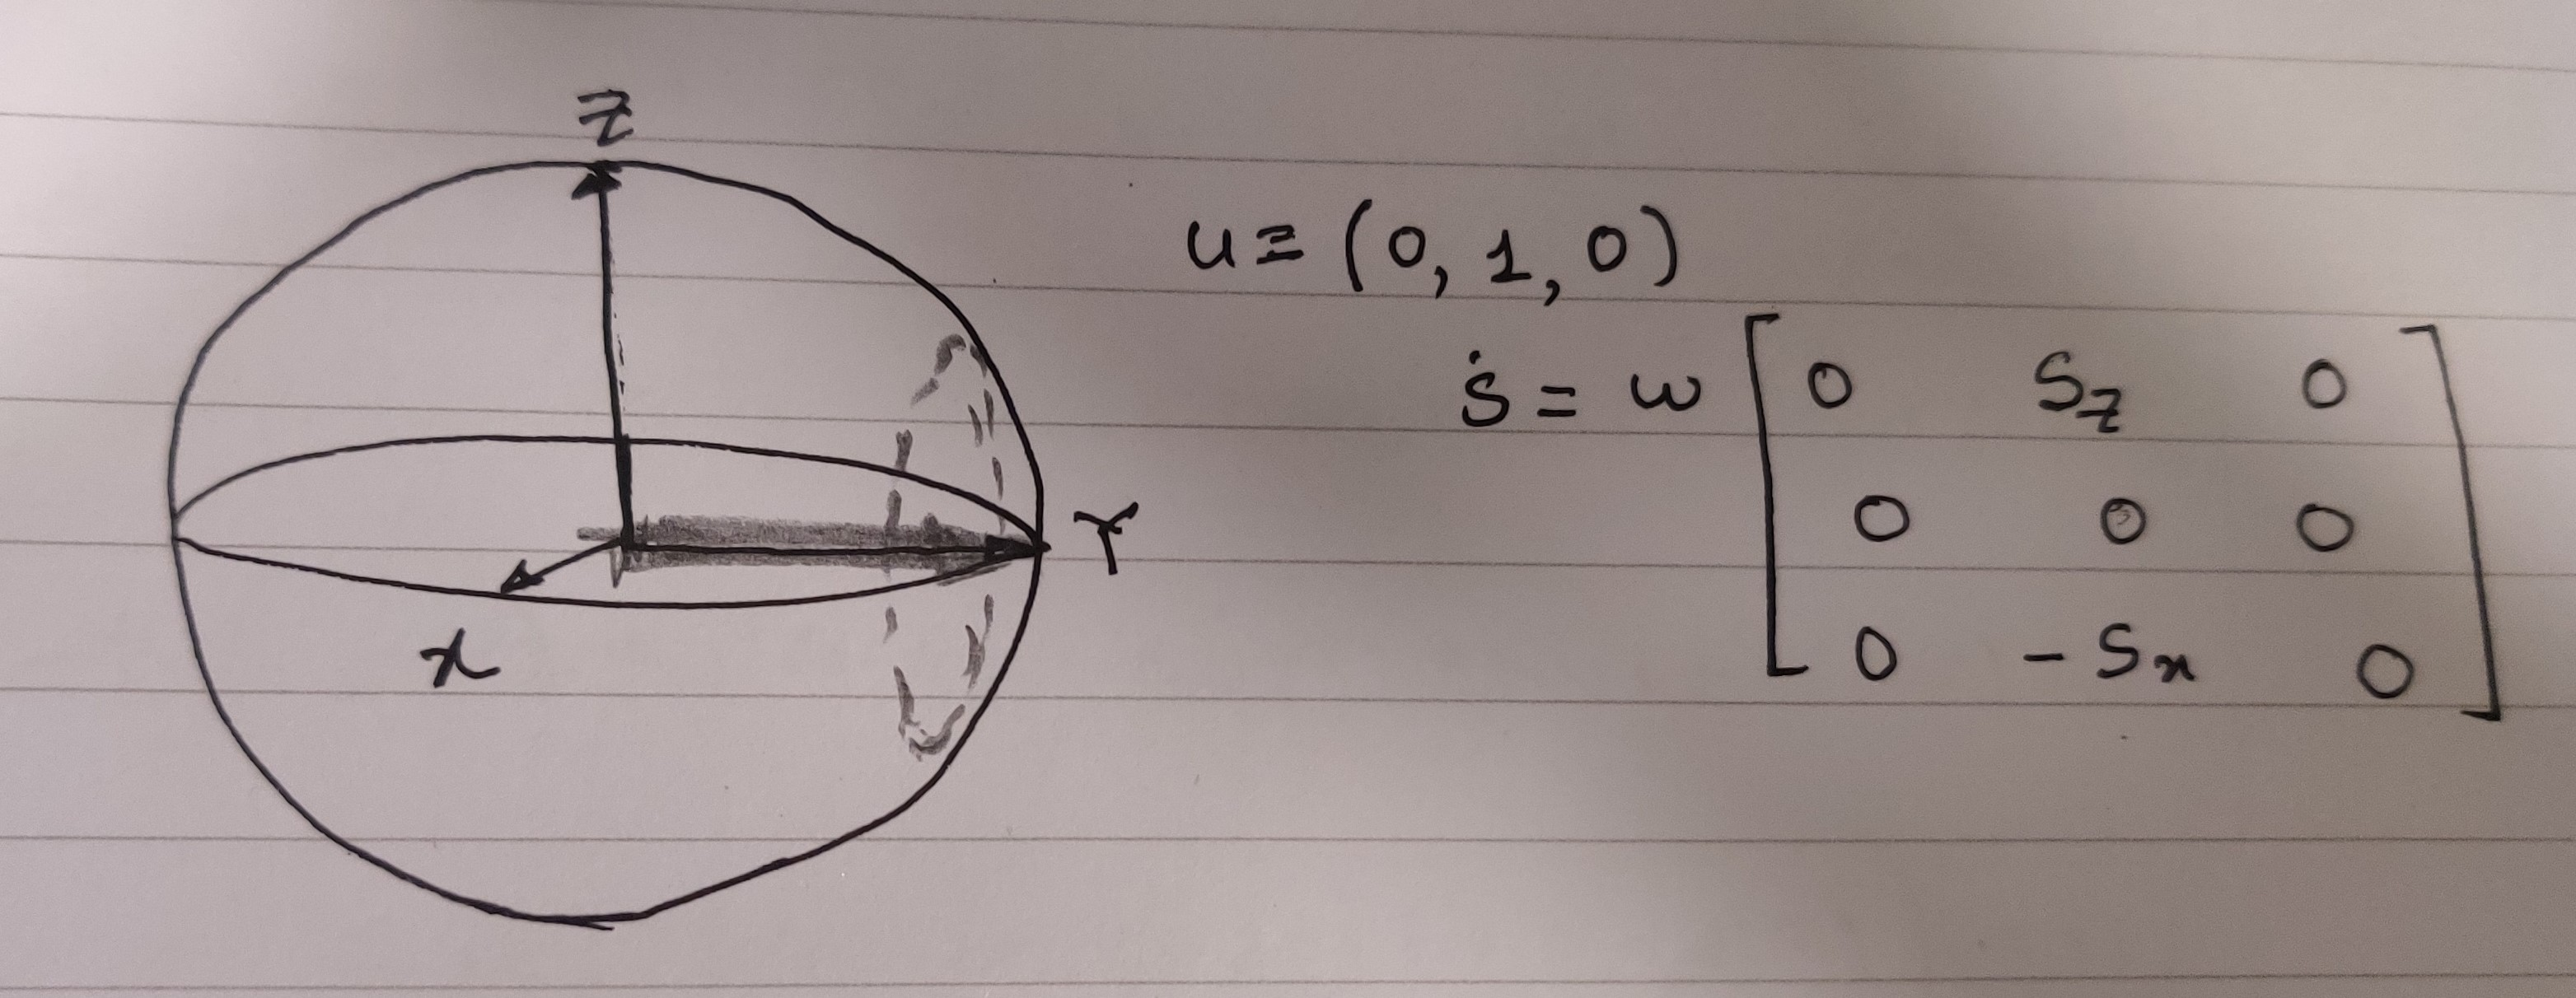

(b) Show that the same equation can be expressed in the form

$$ \mathbf{\dot{s}} = \mathbf{M}\cdot \mathbf{s},$$

and find an explicit expression for the matrix $\mathbf{M}$.

Solution-
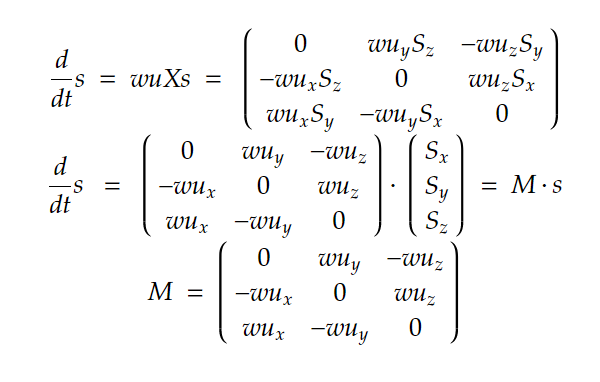

(c) Convince yourself that the explicit solution of the above equation is 

$$ \mathbf{s}(t) = {\rm e}^{\mathbf{M} t} \cdot \mathbf{s}(0).$$

Solve this equation numerically via a similar iteration  as in question 2, i.e. $\mathbf{s}(t+\Delta t) = {\rm e}^{\mathbf{M} \Delta t} \cdot \mathbf{s}(t)$. Use the same Hamiltonian, parameters, and initial condition as question 2. Plot the result for all three components of $\mathbf{s}$.

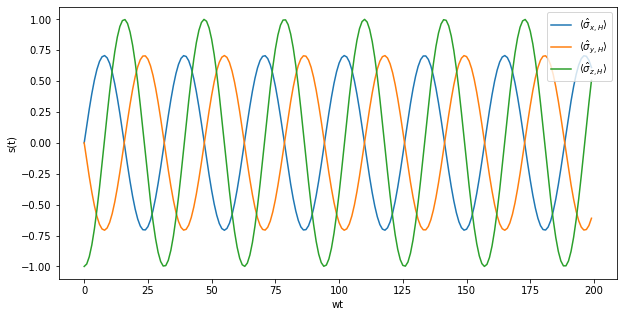

In [134]:
state_1 = np.matrix([[0],[1]])
e_x=float((state_1.T.conjugate() @ sigma_x @ state_1).real)
e_y=float((state_1.T.conjugate() @ sigma_y @ state_1).real)
e_z=float((state_1.T.conjugate() @ sigma_z @ state_1).real)
s_0 = np.matrix([[e_x],[e_y],[e_z]])

M = np.matrix([[0, 0, -0.2/math.sqrt(2)],[0, 0, 0.2/math.sqrt(2)],
               [0.2/math.sqrt(2), -0.2/math.sqrt(2), 0]])
s_t_x = []
s_t_y = []
s_t_z = []
time_interval = []

for wt in range(200):
    s_t = expm(M*wt)@s_0
    s_t_x.append(s_t[0,0])
    s_t_y.append(s_t[1,0])
    s_t_z.append(s_t[2,0])
    time_interval.append(wt)
      
plt.subplots(figsize=(10,5))
plt.xlabel("wt")
plt.ylabel("s(t)")   
plt.plot(time_interval, s_t_x, label=r'$\langle \hat{\sigma}_{x,H}\rangle$')
plt.plot(time_interval, s_t_y, label=r'$\langle \hat{\sigma}_{y,H}\rangle$')
plt.plot(time_interval, s_t_z, label=r'$\langle \hat{\sigma}_{z,H}\rangle$')
plt.legend(loc='upper right')
plt.show()

## 4
Consider a qubit with bare Hamiltonian
$$ \hat{H}_{\rm q} = \tfrac{1}{2}\hbar\omega_0 \hat{\sigma}_z,$$
that is driven by a time-dependent perturbation 
$$ \hat{H}_{\rm d}(t) = \hbar\Omega \sin(\omega_{\rm d} t)\hat{\sigma}_x.$$
Using linear-response theory, derive the change in the observables $\delta\langle \hat{\sigma}_x(t)\rangle$ and $\delta\langle \hat{\sigma}_z(t)\rangle$ assuming the initial state is $\lvert \psi(0)\rangle = \lvert \downarrow\rangle$. Plot the results as a function of time for $\Omega = 0.1\omega_0$ and $\omega_{\rm d} = 0.2\omega_0$. What happens when $\omega_{\rm d} = \omega_0$?

Hint: you may find the following result useful
$$ \int_0^t {\rm d}t'\, \sin[\omega_a(t-t')] \sin(\omega_{b}t') = \frac{\omega_a \sin(\omega_b t) - \omega_b \sin(\omega_a t)}{\omega_a^2 - \omega_b^2}.$$

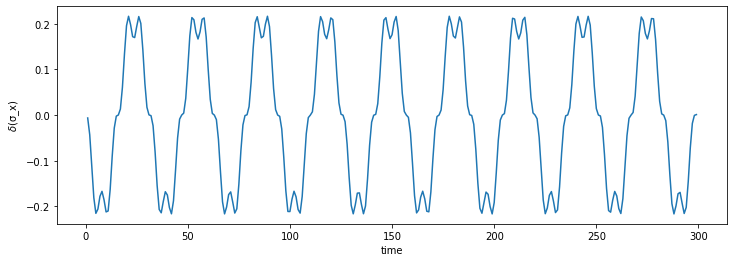

In [108]:
#first case wd=0.2w0
change_in_sigmax = []
time_period = []

for t in range(1,300):
    change_in_obervable_at_t = 0.2*(0.2*np.sin(t)-np.sin(0.2*t))/(1-0.04)
    change_in_sigmax.append(change_in_obervable_at_t)
    time_period.append(t)
    
plt.subplots(figsize=(12,4))
plt.xlabel("time")
plt.ylabel("$\delta$(\u03C3_x)")
plt.plot(time_period,change_in_sigmax)
plt.show()

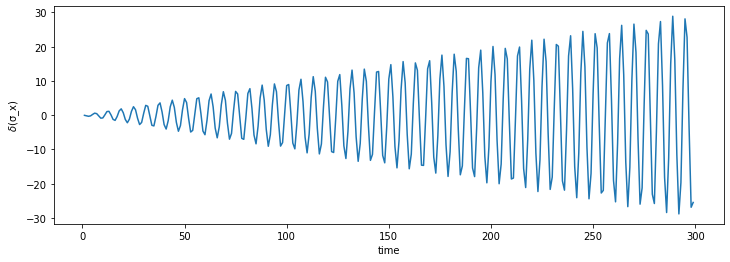

In [123]:
#second case wd=w0
change_in_sigmax = []
time_period = []
wd=1+1e-10
for t in range(1,300):
    change_in_obervable_at_t = 0.2*(wd*np.sin(t)-np.sin(wd*t))/(1-(wd*wd))
    change_in_sigmax.append(change_in_obervable_at_t)
    time_period.append(t)
    
plt.subplots(figsize=(12,4))
plt.xlabel("time")
plt.ylabel("$\delta$(\u03C3_x)")
plt.plot(time_period,change_in_sigmax)
plt.show()

## 5
A driven two-level system is described in the interaction picture by the Hamiltonian

$$ \hat{H}_I = \frac{\hbar \Delta}{2}\hat{\sigma}_z + \frac{\hbar\Omega}{2} \left( \sin\varphi\hat{\sigma}_x - \cos\varphi \hat{\sigma}_y\right),$$

where $\Delta$ is the detuning, $\Omega$ is the Rabi frequency, and $\varphi$ is the phase of the driving field. Write down this Hamiltonian as a matrix.

Solution-
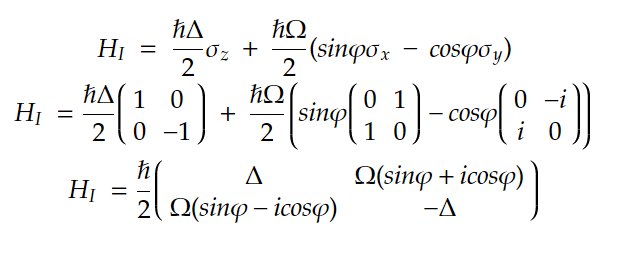

Derive analytical expressions for its eigenvalues and eigenvectors.

Solution-
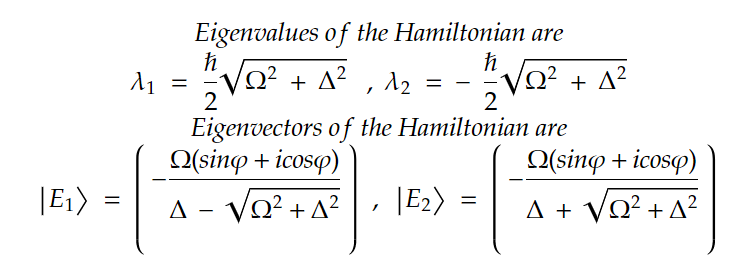

Use these results to write down an expression for the state of the system in the interaction picture $|\psi_I(t)\rangle$, assuming that the initial state is $|\psi(0)\rangle = |\downarrow\rangle$. Derive the probability to find the system in the state $|\uparrow\rangle$ at time $t$. What is the probability to find the system in the state $|\downarrow\rangle$ at time $t$?

Solution-

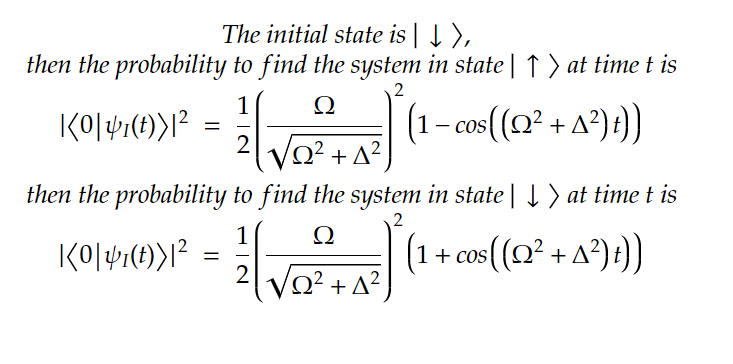

## 6
Consider a general driven system with time-dependent Hamiltonian $\hat{H}(t)$. The evolution operator over the time interval $[t_i,t_f]$ is given by

$$ \hat{U}(t_f,t_i) = \overleftarrow{\rm T}\exp \left[ \frac{1}{{\rm i}\hbar}\int_{t_i}^{t_f}{\rm d}t \hat{H}(t)\right].$$

For numerical purposes, the Schrödinger-picture time evolution between two neighbouring grid points is

$$|\psi(t_{n+1})\rangle = \hat{U}(t_{n+1},t_n)|\psi(t_n)\rangle,$$

where $t_n = n\Delta t$. If $\Delta t$ is small enough that the Hamiltonian can be approximated as constant between $t_n$ and $t_{n+1}$, convince yourself that

$$ \hat{U}(t_{n+1},t_n) \approx {\rm e}^{-{\rm i}\Delta t\hat{H}(t_n)/\hbar}. $$      

Now specialise to a driven qubit with Hamiltonian

$$\hat{H}(t) = \tfrac{1}{2}\hbar \omega_0 \hat{\sigma}_z  + \hbar \Omega \sin(\omega_{\rm d}t)\hat{\sigma}_x.$$

Compute the time evolution of the state in the Schrödinger picture numerically using the above approximation for $\hat{U}(t_{n+1},t_n)$. Consider the evolution up to time $t=100\omega_0^{-1}$, for a near-resonant drive, $\omega_{\rm d} = 0.99\omega_0$, and Rabi frequency $\Omega = 0.1\omega_0$. Choose the initial state to be $|\psi(0)\rangle = |\downarrow\rangle$ and the timestep to be $\Delta t=0.05\omega_0^{-1}$. Plot the expectation values of the three Pauli operators as a function of dimensionless time $\omega_0 t$ and compare your predictions to those of the rotating-wave approximation. Repeat the comparison for $\Omega = \omega_0$. Comment briefly on the validity of the rotating-wave approximation in each case. (Hint: you are always free to work in a convenient unit system, e.g. by choosing units of time such that $\omega_0=1$.)

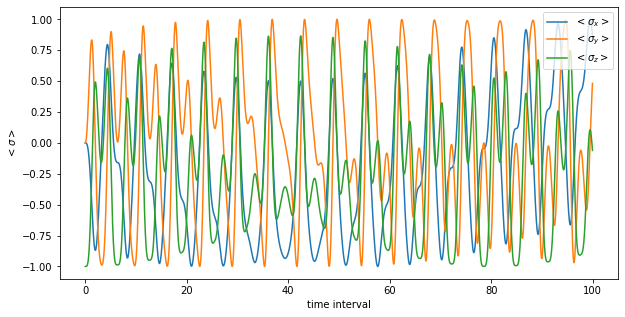

In [143]:
#inital values
delta_t = 0.05
w_d = 0.99
rabi = 1
psi_0 = np.matrix([[0],[1]])

time_interval = np.arange(0, 100, 0.05).tolist()
expectation_value = np.zeros((3,len(time_interval)))

delta = 1 - omega_d
eigenvalue = np.sqrt(rabi*2 + delta*2)
eigenstate1 = np.matrix([[1j*rabi/(np.sqrt(2*eigenvalue*(eigenvalue-delta)))],[np.sqrt((eigenvalue-delta)/(2*eigenvalue))]]) 
eigenstate2 = np.matrix([[-1j*rabi/(np.sqrt(2*eigenvalue*(eigenvalue+delta)))],[np.sqrt((eigenvalue+delta)/(2*eigenvalue))]])
#av2 = np.zeros((3,len(tar)))
for t in range(len(time_interval)):
    #expectation value of x
    expectation_value[0,t] = np.matmul(np.transpose(np.conj(psi_0)),np.matmul(sigma_x,psi_0)).real
    #expectation value of y
    expectation_value[1,t] = np.matmul(np.transpose(np.conj(psi_0)),np.matmul(sigma_y,psi_0)).real
    #expectation value of z
    expectation_value[2,t] = np.matmul(np.transpose(np.conj(psi_0)),np.matmul(sigma_z,psi_0)).real
    
    H = 0.5*sigma_z + rabi*np.sin(time_interval[t])*sigma_x
    U = expm(-1j*H*delta_t)
    psi_0 = np.matmul(U,psi_0)
        
plt.subplots(figsize=(10,5))
plt.plot(time_interval,expectation_value[0,:],label = '$<\u03C3_x>$')
plt.plot(time_interval,expectation_value[1,:],label = '$<\u03C3_y>$')
plt.plot(time_interval,expectation_value[2,:],label = '$<\u03C3_z>$')
plt.legend(loc='upper right')
plt.xlabel("time interval")
plt.ylabel('$<\u03C3>$')
plt.show()

## 7
Consider a three-level system with Hamiltonian

$$ \hat{H}_\Lambda = \sum_{j=1}^2 \hbar\omega_j |j\rangle\langle j|,$$

where $\hbar\omega_j$ is the energy difference between state $|j\rangle$ and the ground state, $|0\rangle$. The system is driven by the time-dependent perturbation

$$\hat{H}_{\rm drive} = \hbar \Omega_0 \cos(\omega_{\rm d} t)|0\rangle \langle 2| +\hbar \Omega_1 \cos([\omega_{\rm d} - \omega_1]t) |1\rangle\langle 2| +{\rm h.c.},$$
   
where $\Omega_{0,1}$ are Rabi frequencies and $\omega_{\rm d}$ is the frequency of the driving field, while ${\rm h.c.}$ stands for the Hermitian conjugate of the preceding terms.
    
    
(a) Move to an interaction picture with respect to the free Hamiltonian $\hat{H}_0 = \hbar\omega_{\rm d}|2\rangle \langle 2| + \hbar\omega_1 |1\rangle \langle 1|$. Show explicitly that the interaction-picture Hamiltonian is 
    
$$ \hat{H}_I = \hbar\begin{pmatrix}
		0 & 0 & \Omega_0/2 \\
		0 & 0 & \Omega_1/2\\
		\Omega_0/2 & \Omega_1/2 & \Delta
	\end{pmatrix} .$$
    
Solution-

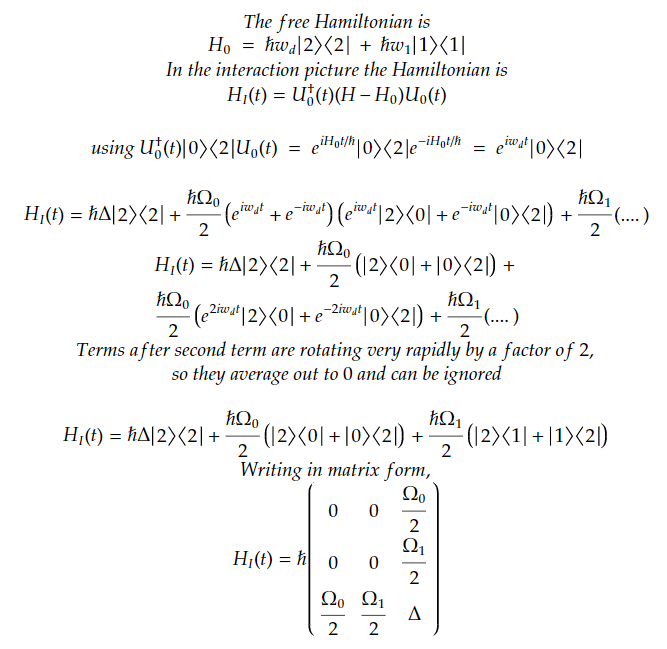

(b) Find an analytical expression for the eigenvector of $\hat{H}_I$ that is orthogonal to $|2\rangle$. Give the corresponding eigenvalue.

(c) Calculate the time evolution (in the interaction picture) at time $t$ given an initial condition $|\psi(0)\rangle = |0\rangle$. Feel free to do this numerically or analytically. Set $\Omega_0 = \Omega_1 = \Omega$ and plot the populations of the states $|1\rangle$ and $|2\rangle$ as a function of dimensionless time $\Omega t$ up to $\Omega t = 200$ for two cases: $\Delta = 10\Omega$ and $\Delta = \Omega$. Comment briefly on the results.

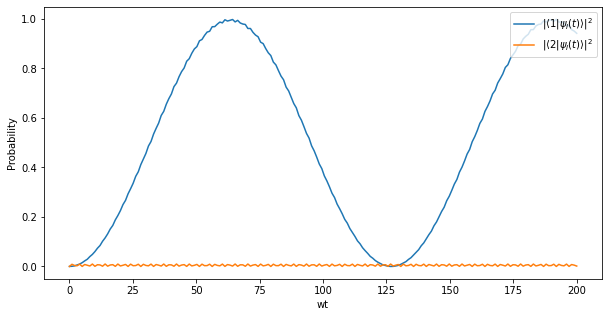

In [144]:
#first case ohm=1,Delta=10
time_interval = np.linspace(0, 200, 200)
H = np.matrix([[0,0,1/2],[0,0,1/2],[1/2,1/2,10]])
psi_0=np.matrix([[1],[0],[0]])
state_1=np.array([[0], [1], [0]])
state_2=np.array([[0], [0], [1]])
probabilities_1=[]
probabilities_2=[]
for t in range(200):
    U_t = expm(-1j*H*t)@psi_0
    probability_state_1 = complex(state_1.T.conjugate() @ U_t)
    probability_1 = probability_state_1.conjugate() * probability_state_1
    probabilities_1.append(probability_1.real)
    probability_state_2 = complex(state_2.T.conjugate() @ U_t)
    probability_2 = probability_state_2.conjugate() * probability_state_2
    probabilities_2.append(probability_2.real)
    
plt.subplots(figsize=(10,5))    
plt.plot(time_interval, probabilities_1, label = r'$|\langle 1 | \psi_I(t)\rangle|^2$')
plt.plot(time_interval, probabilities_2, label = r'$|\langle 2 | \psi_I(t)\rangle|^2$')
plt.ylabel("Probability")
plt.xlabel("wt")
plt.legend(loc='upper right')
plt.show()

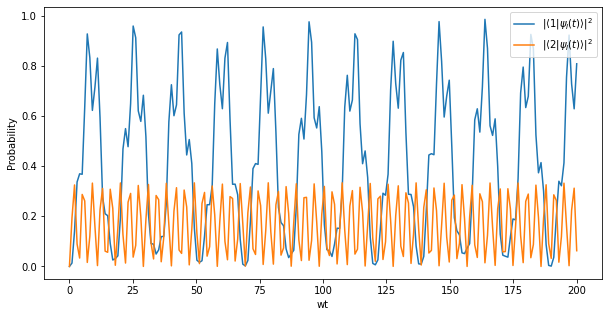

In [145]:
#second case ohm=1,Delta=1
time_interval = np.linspace(0, 200, 200)
H = np.matrix([[0,0,1/2],[0,0,1/2],[1/2,1/2,1]])
psi_0=np.matrix([[1],[0],[0]])
state_1=np.array([[0], [1], [0]])
state_2=np.array([[0], [0], [1]])
probabilities_1=[]
probabilities_2=[]
for t in range(200):
    U_t = expm(-1j*H*t)@psi_0
    probability_state_1 = complex(state_1.T.conjugate() @ U_t)
    probability_1 = probability_state_1.conjugate() * probability_state_1
    probabilities_1.append(probability_1.real)
    probability_state_2 = complex(state_2.T.conjugate() @ U_t)
    probability_2 = probability_state_2.conjugate() * probability_state_2
    probabilities_2.append(probability_2.real)
    
plt.subplots(figsize=(10,5))    
plt.plot(time_interval, probabilities_1, label = r'$|\langle 1 | \psi_I(t)\rangle|^2$')
plt.plot(time_interval, probabilities_2, label = r'$|\langle 2 | \psi_I(t)\rangle|^2$')
plt.ylabel("Probability")
plt.xlabel("wt")
plt.legend(loc='upper right')
plt.show()
    

## 8
(a) Construct the two-qubit Hamiltonian matrix

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z$$

by combining single-qubit Pauli matrices with [tensor products](https://numpy.org/doc/stable/reference/generated/numpy.kron.html). Choose $\hbar\omega_A = 1$, $\hbar\omega_B = 0.5$, $\hbar J = 0.5$ and $\hbar V=0.1$. Print out the matrix explicitly and calculate its eigenvalues and eigenvectors. Calculate the overlap between the ground state and the state $|01\rangle = |0\rangle \otimes |1\rangle$. (The single-qubit states $|0\rangle$ and $|1\rangle$ are defined by $\hat{\sigma}_z|s\rangle = (-1)^s|s\rangle$ for $s=0,1$.)

Solution-

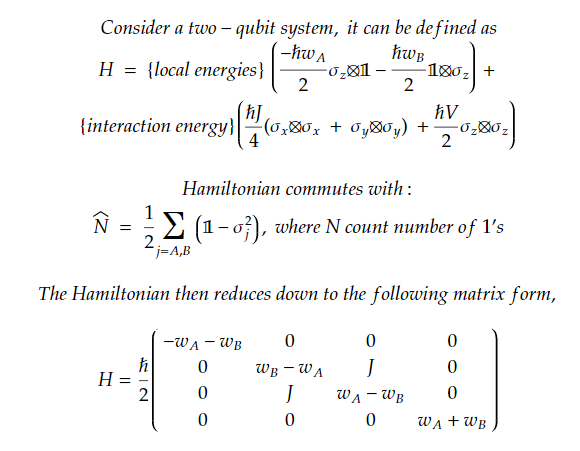

In [148]:
hw_A=1
hw_B=0.5
hJ=0.5
hV=0.1
H=(1/2)*np.matrix([[-hw_A-hw_B,0,0,0],[0,hw_B-hw_A,hJ,0],[0,hJ,hw_A-hw_B,0],[0,0,0,hw_A+hw_B]])
print(H)

[[-0.75  0.    0.    0.  ]
 [ 0.   -0.25  0.25  0.  ]
 [ 0.    0.25  0.25  0.  ]
 [ 0.    0.    0.    0.75]]


In [149]:
#calculating eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(H)

for eigenvalue in range(len(eigenvalues)):
    print('Eigenvalue =',eigenvalues[eigenvalue].real, ' ; ', '\nEigenstate =', eigenvectors[:,eigenvalue])

Eigenvalue = 0.35355339059327373  ;  
Eigenstate = [[0.        ]
 [0.38268343]
 [0.92387953]
 [0.        ]]
Eigenvalue = -0.3535533905932738  ;  
Eigenstate = [[ 0.        ]
 [ 0.92387953]
 [-0.38268343]
 [ 0.        ]]
Eigenvalue = -0.75  ;  
Eigenstate = [[1.]
 [0.]
 [0.]
 [0.]]
Eigenvalue = 0.75  ;  
Eigenstate = [[0.]
 [0.]
 [0.]
 [1.]]


In [161]:
#Finding overlap between 00 and 01

#calculating ground state eigenstate and eigenvalue:
eigenenergies = [i.real for i in eigenvalues]
min_energy=min(eigenenergies)
#we have to find the smaller one and its index to know the corresponding eigenstate:
state_00 = eigenvectors[:,eigenenergies.index(min_energy)]
state_10 = kron(np.array([[1], [0]]), np.array([[0], [1]]))
overlap = state_00.T.conjugate() @ state_10

if overlap.imag==0:
    print("Overlap between 00 and 10 is-", overlap.real)
    print("Probability of measuring |01> when the system is in the ground state:", overlap.real*overlap.real)
else: 
    print('Overlap between 00 and 10 is-', overlap),
    print("Probability of measuring |01> when the system is in the ground state:", overlap*overlap.conjugate().real)

Overlap between 00 and 10 is- [[0.]]
Probability of measuring |01> when the system is in the ground state: [[0.]]


(b) Calculate the expectation value of $\hat{\sigma}_z\otimes \mathbb{1}$ as a function of time in the interval $t \in [0,10]$ starting from the state $|\psi(0)\rangle = |10\rangle$. (For example, by discretising time into small steps $\Delta t$, as in previous exercises.) Repeat this exercise for the initial state $|\psi(0)\rangle = |+\rangle\otimes |0\rangle$, where $|+\rangle = (|0\rangle + |1\rangle)/\sqrt{2}$. Plot both results and give a couple of sentences to explain their physical meaning.

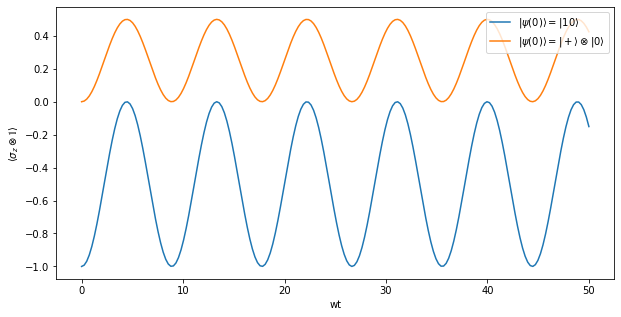

In [163]:
psi_0=np.matrix([[0],[0],[1],[0]])
plus_state = 1/np.sqrt(2) * np.array([[1], [1]])
delta_t=0.5
U_t=expm(-1j*H*delta_t)
operator=kron(sigma_z,I)
expectation_values=[]
time_interval = np.linspace(0, 50, 200)

for t in time_interval:
    psi_t=expm(-1j* t * H) @ psi_0
    expectation_value= psi_t.T.conjugate() @ operator @ psi_t
    expectation_values.append(float(expectation_value.real))
    

plt.subplots(figsize=(10,5))
plt.plot(time_interval,expectation_values,label=r'$|\psi(0)\rangle = |10\rangle$')
plus = 1/np.sqrt(2) * np.array([[1], [1]])


expectation_values_plus=[]
psi_0 = kron(plus, np.array([[1], [0]]))
for t in time_interval:
    psi_t=expm(-1j* t * H) @ psi_0
    expectation_value= psi_t.T.conjugate() @ operator @ psi_t
    expectation_values_plus.append(float(expectation_value.real))

plt.plot(time_interval,expectation_values_plus,label=r'$|\psi(0)\rangle = |+\rangle\otimes|0\rangle$')
plt.xlabel("wt")
plt.ylabel(r'$\langle \sigma_z\otimes \mathbb{1}\rangle$')
plt.legend(loc='upper right')
plt.show()

(c) Let's try to generalise this to multi-qubit systems. As a first step, define a list whose first element is 

$$ \hat{\sigma}^{z}_A = \hat{\sigma}_{z}\otimes \hat{\mathbb{1}},$$

and whose second element is

$$ \hat{\sigma}^{z}_B = \hat{\mathbb{1}}\otimes\hat{\sigma}_{z}.$$

Define analogous lists for the operators $\hat{\sigma}^x_{A,B}$ and $\sigma^y_{A,B}$. This extends the single-qubit Pauli matrices to operators acting on the two-qubit Hilbert space. Use these operators and their products to construct the Hamiltonian from part (a). 

In [157]:
H_new = -hw_A/2*kron(sigma_z,I)-hw_B/2*kron(I,sigma_z)+hJ/4*(kron(sigma_x,I)@kron(I,sigma_x)+kron(sigma_y,I)@kron(I,sigma_y))+hV/2*kron(sigma_z,I)@kron(I,sigma_z)
print(H_new)

[[-0.7 +0.j  0.  +0.j  0.  +0.j  0.  +0.j]
 [ 0.  +0.j -0.3 +0.j  0.25+0.j  0.  +0.j]
 [ 0.  +0.j  0.25+0.j  0.2 +0.j  0.  +0.j]
 [ 0.  +0.j  0.  +0.j  0.  +0.j  0.8 +0.j]]


(d) Now extend this construction to a four-qubit system. More precisely, define three lists (one for each Pauli matrix) of four elements each. Each element will be an operator on the four-qubit Hilbert space, e.g. the first element of one of the lists could be $\hat{\sigma}_x$ for qubit 1, the second element will be $\hat{\sigma}_x$ for qubit 2, etc.

Now generalise this to $L$ qubits. Write a function that takes an integer $L$ as input, and outputs three lists of Pauli operators extended to the $L$-qubit Hilbert space.

In [169]:
def Hilbert_Space(L):
    #pauli matrices and identity
    X = np.array([[0, 1], [1, 0]])
    Y = np.array([[0, -1j], [1j, 0]])
    Z = np.array([[1, 0], [0, -1]])
    I = np.array([[1, 0], [0, 1]])
    sigmas = [I, X, Y, Z]

    X = []
    Y = []
    Z = []
    for i in range(L):
        for j in range(L):
            if i==j:
                X.append(sigma_x)
                Y.append(sigma_y)
                Z.append(sigma_z)
            if i!=j:
                X.append(I)
                Y.append(I)
                Z.append(I)            
    #reduced tensor products
    X_reduced = [ft.reduce(kron, X[i:i+L]) for i in range(0, L**2, L)]
    Y_reduced = [ft.reduce(kron, Y[i:i+L]) for i in range(0, L**2, L)]
    Z_reduced = [ft.reduce(kron, Z[i:i+L]) for i in range(0, L**2, L)]
    return X_reduced, Y_reduced, Z_reduced

(e) The $L$-qubit generalisation of the Hamiltonian from (a) reads as

$$ \hat{H}  = -\sum_{j=1}^L\frac{\hbar\omega_j}{2}\hat{\sigma}_j^z +  \sum_{j=1}^{L-1}\left[\frac{\hbar J}{4} \left ( \hat{\sigma}^x_j  \hat{\sigma}^x_{j+1} + \hat{\sigma}^y_{j} \hat{\sigma}^y_{j+1} \right  ) + \frac{\hbar V}{2}  \hat{\sigma}^z_j \hat{\sigma}^z_{j+1}\right].$$

Construct this Hamiltonian for $L=5$ qubits, with equal local energies $\omega_j = \omega_0$ for all qubits, $ J = \tfrac{1}{2}\omega_0$ and $V = 0$. Compute and plot the time evolution of $\langle \hat{\sigma}^z_1\rangle$ starting from an initial state $|\psi(0)\rangle = |10000\rangle$ up to a time $Jt = 30$. Repeat the calculation for $L=6,7,8,9$ qubits with a similar initial state (i.e. $|\psi(0)\rangle = |100\cdots 00\rangle$). Explore the effect of switching on a finite interaction strength $V$. Briefly discuss (max. one paragraph) the features that you see and the differences between these various examples. 

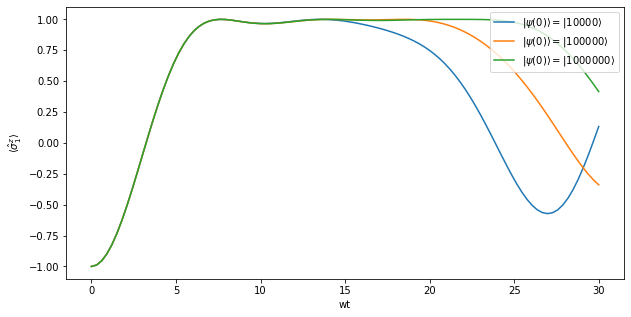

In [191]:
#case when V=0
hV=0
time_interval=np.linspace(0,30,100)

def Hilbert_Space_L(L,state_str):

    X_reduced, Y_reduced, Z_reduced = Hilbert_Space(L)
    psi_0 = np.array([[1], [0]])
    psi_1= np.array([[0], [1]])

    state_string = []
    for i in state_str:
        if i=='0':
            state_string.append(psi_0)
        else: 
            state_string.append(psi_1)

    state_0 = ft.reduce(kron, state_string)

    #state_0 = ft.reduce(kron, np.array[psi_1,psi_0,psi_0,psi_0,psi_0])
    hw_J = [1 for i in range(L)]
    expectation_vales=[]
    for wt in time_interval:
        H1=sum([hw_J[i]/2*Z_reduced[i] for i in range(L)])
        H2=sum([(hJ/4*(X_reduced[i]@X_reduced[i+1]+Y_reduced[i]@Y_reduced[i+1])+hV/2*Z_reduced[i]@Z_reduced[i+1]) for i in range(L-1)])
        H=H2-H1
        psi_t=expm(-1j*wt*H)@state_0
        expectation_value = psi_t.T.conjugate() @ Z_reduced[0] @ psi_t
        expectation_vales.append(float(expectation_value.real))
    
    return expectation_vales
   

#L=5
expectation_vales_5=Hilbert_Space_L(5,"10000")
plt.subplots(figsize=(10,5)) 
plt.plot(time_interval, expectation_vales_5, label = r'$|\psi(0)\rangle = |10000\rangle$')

#L=6
expectation_values_6=Hilbert_Space_L(6,"100000")
plt.plot(time_interval, expectation_values_6, label = r'$|\psi(0)\rangle = |100000\rangle$')

#L=7
expectation_values_7=Hilbert_Space_L(7,"1000000")
plt.plot(time_interval, expectation_values_7, label = r'$|\psi(0)\rangle = |1000000\rangle$')

plt.xlabel("wt")
plt.ylabel(r'$\langle \hat{\sigma}^z_1 \rangle$')
plt.legend(loc='upper right')
plt.show()